In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K
from src import data_source

import random

%matplotlib inline

/Users/Brian/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.


Running in stage: dev


In [3]:
X_train, subject_train, activity_train, feature_names = data_source.get_timeseries_data('train')

In [4]:
X_train.shape

(3285, 6, 128, 1)

In [5]:
X_train, subject_train, activity_train, feature_names = data_source.get_timeseries_data('test')

In [6]:
X_train.shape

(1387, 6, 128, 1)

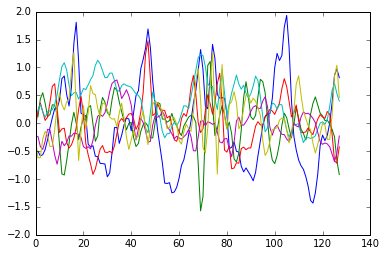

In [7]:
for i in range(X_train.shape[1]):
    plt.plot(X_train[0, i])

In [8]:
activity_train

matrix([[ 0.,  0.,  1.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        ..., 
        [ 0.,  0.,  1.],
        [ 0.,  1.,  0.],
        [ 1.,  0.,  0.]])

In [9]:
walking_idx = np.nonzero(activity_train == np.array([1, 0, 0]))[0]
walking_upstairs_idx = np.nonzero(activity_train == np.array([0, 1, 0]))[0]
walking_downstairs_idx = np.nonzero(activity_train == np.array([0, 0, 1]))[0]

In [10]:
walking_data = X_train[walking_idx]
walking_upstairs_data = X_train[walking_upstairs_idx]
walking_downstairs_data = X_train[walking_downstairs_idx]

In [11]:
separate_data = [walking_data, walking_upstairs_data, walking_downstairs_data]

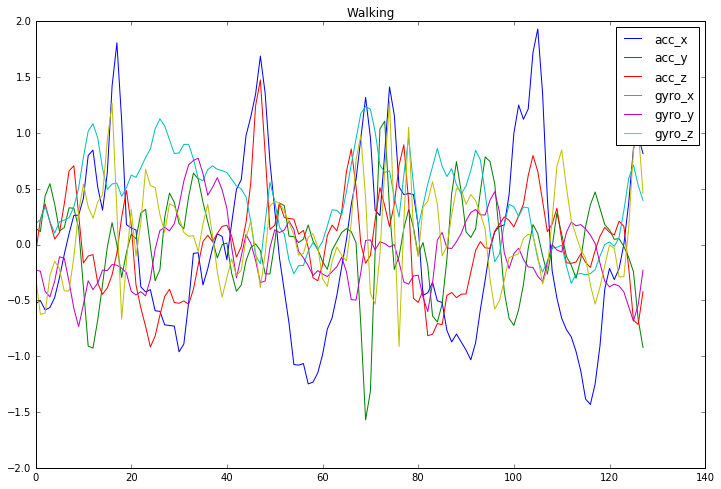

In [12]:
plt.figure(figsize=(12,8))
for i in range(X_train.shape[1]):
    plt.plot(walking_data[0, i], label=feature_names[i])
plt.title("Walking")
plt.legend()
plt.savefig('images/walking_raw_large.png', bbox_inches='tight')

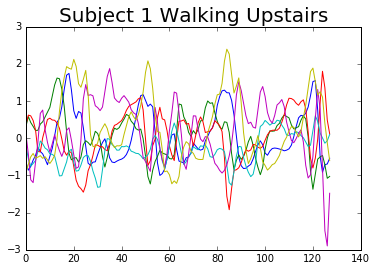

In [41]:
for i in range(X_train.shape[1]):
    plt.plot(walking_upstairs_data[4, i])
plt.title("Subject 1 Walking Upstairs", {'size':20})

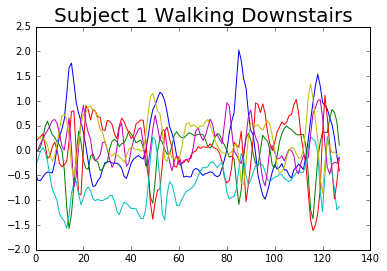

In [42]:
for i in range(X_train.shape[1]):
    plt.plot(walking_downstairs_data[5, i])
plt.title("Subject 1 Walking Downstairs", {'size':20})

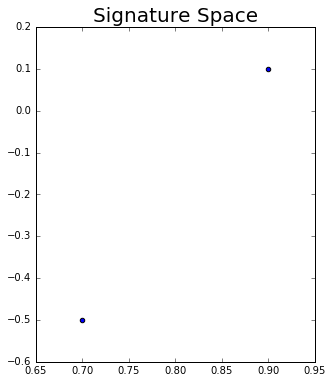

In [40]:
plt.figure(figsize=(5,6))
plt.title("Signature Space", {'size':20})
plt.scatter([0.7, 0.9], [-.5, .1])

In [15]:
class_labels = np.array(['Walking', 'Walking Upstairs', 'Walking Downstairs'])

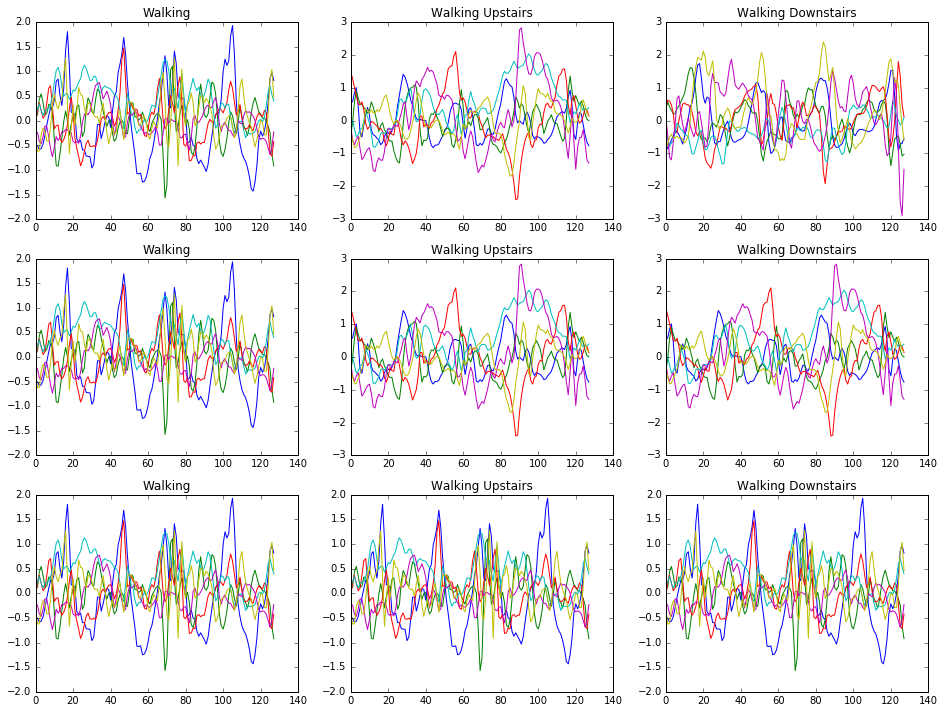

In [16]:
# Use the same test subject for rows
f, axarr = plt.subplots(3, 3, figsize=(16,12))

for i in range(3):
    for j in range(3):
        axarr[i, j].set_title(class_labels[j])
        for k in range(X_train.shape[1]):
            axarr[i, j].plot(separate_data[i][j, k])
        

In [17]:
f.savefig('images/raw_data.png', bbox_inches='tight')

In [18]:
feature_names

['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [19]:
X_train.shape

(1387, 6, 128, 1)

## Visualization of Convo Filters

In [20]:
from src.models import maybe_train_activity_model

ImportError: No module named models

In [ ]:
# Load the model from disk if possible
model = maybe_train_activity_model()
convo_filters = model.layers[0].get_weights()[0]

In [ ]:
filter = convo_filters[5]

plt.figure(figsize=(1,4))
for i in range(filter.shape[0]):
    plt.plot(filter[i, :, 0], label=feature_names[i])
plt.title("Walking")
#plt.legend()
plt.show()

In [ ]:
def get_convo_activations(model, X):
    """
    Returns the output of the first layer of the model for the given data.

    :param model:
    :param data:
    :return:
    """
    convout1 = model.layers[1]
    convout1_f = K.function(model.inputs, [convout1.output])

    return convout1_f([X])

In [ ]:
activations = get_convo_activations(model, X_train)

In [ ]:
X_train[0].shape

In [ ]:
activations[0][0].shape

In [ ]:
i=7
plt.plot(activations[0][0][i, :, 0])

In [ ]:
n = random.randrange(100)
filter1 = random.randrange(16)
filter2 = random.randrange(16)

# Use the same test subject for rows
f, axarr = plt.subplots(2, 1, figsize=(16,6))
axarr[0].set_title("data")
for i in range(X_train.shape[1]):
    axarr[0].plot(X_train[n, i, :, 0])
    
    
x_size = X_train.shape[2]
# Array of nans
activations1 = np.zeros(x_size)/0

axarr[1].set_title("selected filter activations")
# We need to pad the activations because using a convo filter shortens the data slightly
activations1 = activations[0][n][filter1, :, 0]
activations1 = np.lib.pad(activations1, (4,3), 'constant', constant_values=(np.nan, np.nan))
axarr[1].plot(activations1, label="filter{}".format(filter1))
# We need to pad the activations because using a convo filter shortens the data slightly
activations2 = activations[0][n][filter2, :, 0]
activations2 = np.lib.pad(activations2, (4,3), 'constant', constant_values=(np.nan, np.nan))
axarr[1].plot(activations2, label="filter{}".format(filter2))
axarr[1].legend()

In [ ]:
np.zeros(4)/0

In [ ]:
X_train.shape

In [ ]:
a = [1., 2, 3, 4, 5]
np.lib.pad(a, (4,3), 'constant', constant_values=(np.nan, np.nan))